In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/shubh0799/churn-modelling

# SS

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [8]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


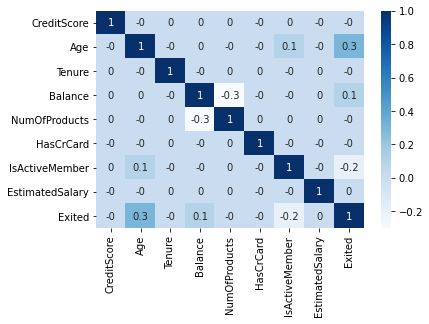

In [9]:
sns.heatmap(cor_matrix, annot = True, cmap='Blues')

# EDA

**Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary**

**Categorical: HasCrCard, IsActiveMember, Gender, Geography**


## Continuous

### Histogram

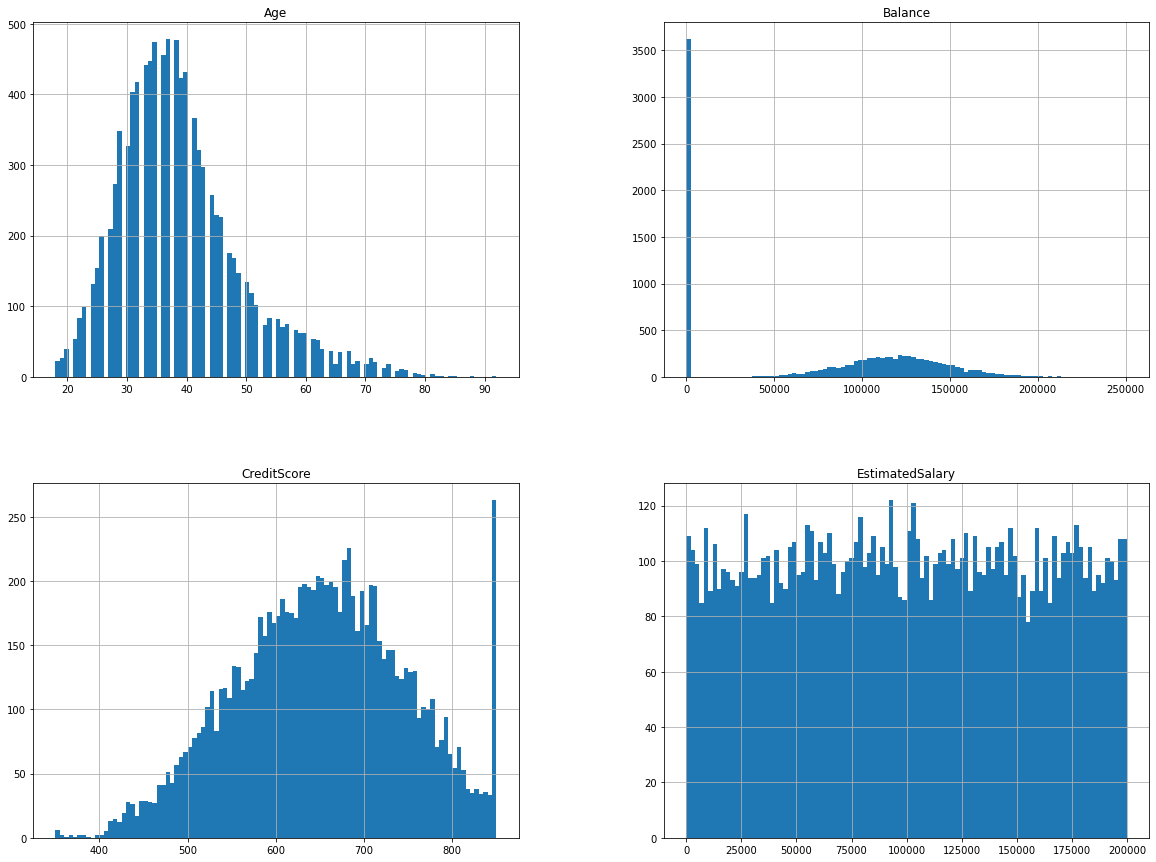

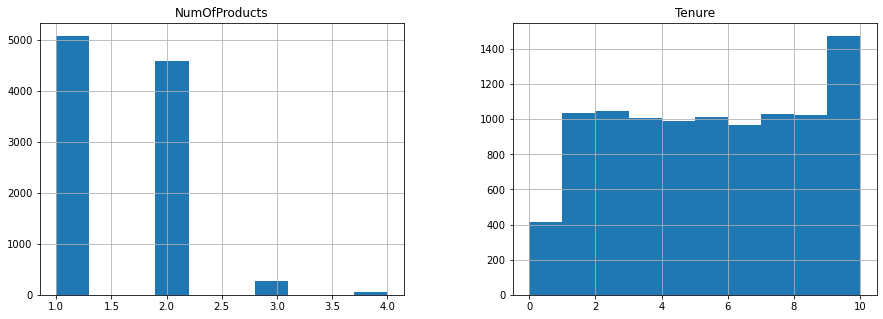

In [10]:
df.hist(column = ['CreditScore','Age','Balance','EstimatedSalary'],bins=100, figsize=(20, 15))
df.hist(column = ['Tenure','NumOfProducts'], figsize = (15,5))
plt.show()

### Boxplot

CreditScore           AxesSubplot(0.125,0.657941;0.352273x0.222059)
Age                AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Balance               AxesSubplot(0.125,0.391471;0.352273x0.222059)
EstimatedSalary    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Tenure                   AxesSubplot(0.125,0.125;0.352273x0.222059)
NumOfProducts         AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

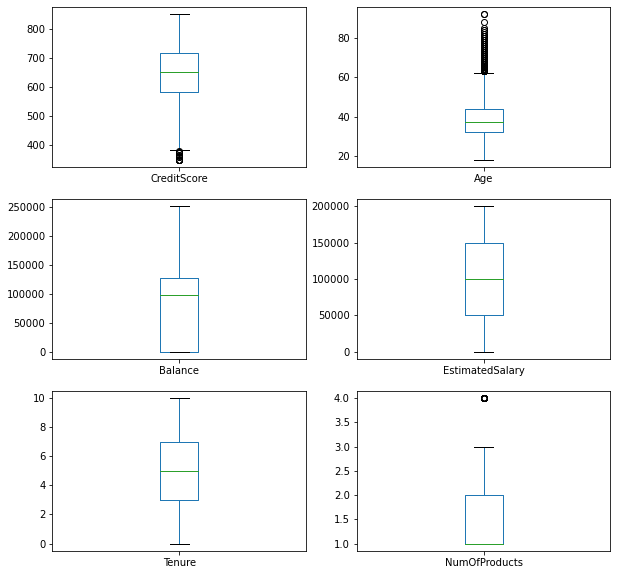

In [11]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure','NumOfProducts']].plot.box(subplots = True, layout=(3,2), figsize=(10, 10))

## Categorical

### Bar chart

In [13]:
#HasCrCard, IsActiveMember, Gender, Geography

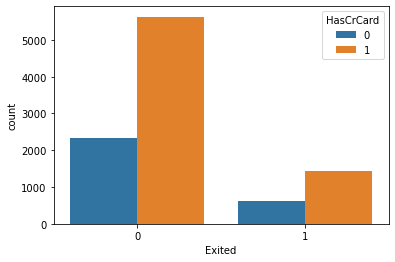

In [14]:
sns.countplot(x='Exited', hue='HasCrCard', data=df)

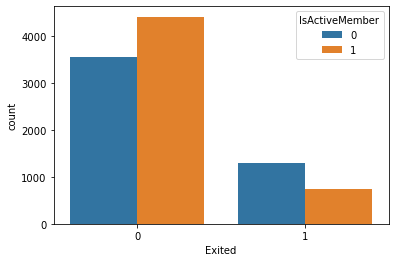

In [15]:
sns.countplot(x='Exited', hue='IsActiveMember', data=df)

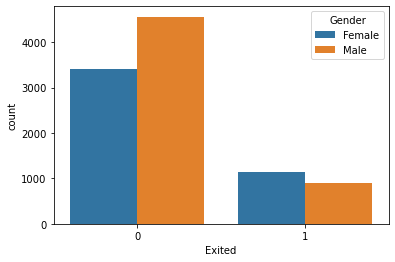

In [16]:
sns.countplot(x='Exited', hue='Gender', data=df)

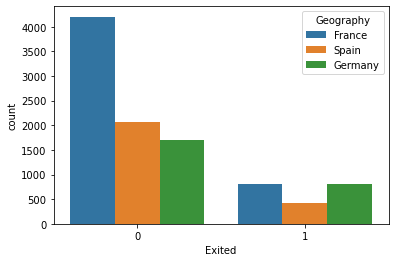

In [17]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [18]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


# Data Cleaning and Preparation

## Data Cleaning

### Gender

In [19]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### Geography

In [20]:
country_dummies = pd.get_dummies(df['Geography'])

country_dummies.head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [21]:
df = pd.DataFrame.join(df, country_dummies)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


### Drop ...

In [22]:
df.drop(['Geography', 'Spain'], axis=1, inplace=True)

df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


**Number ...**

## Preparation

In [24]:
from scipy import stats

In [25]:
for i in df.columns:
    print(i, ':', len(df[np.abs(stats.zscore(df[i])) > 3][i]))

CreditScore : 8
Gender : 0
Age : 133
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0
France : 0
Germany : 0


=> 201 outliers

CreditScore         AxesSubplot(0.125,0.125;0.227941x0.755)
Age              AxesSubplot(0.398529,0.125;0.227941x0.755)
NumOfProducts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

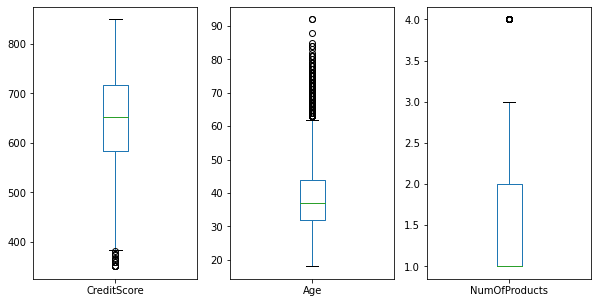

In [26]:
df[['CreditScore', 'Age','NumOfProducts']].plot.box(subplots = True, layout=(1,3), figsize=(10, 5))

In [27]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


**201 rows has been deleted**

reindex

In [28]:
index=pd.Index([i for i in range(9799)])

df.index = index

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9794,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9795,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9796,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9797,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# Fit models

In [29]:
# Splitting into training test and test set
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [30]:
from sklearn import model_selection
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
results=[]
names=[]
seed=7

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\HI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.794666(0.017161)


C:\Users\HI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CARD:0.785549(0.011527)


C:\Users\HI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN:0.766501(0.016740)


C:\Users\HI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA:0.821609(0.016795)
NB:0.794803(0.018506)


C:\Users\HI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM:0.798477(0.018555)


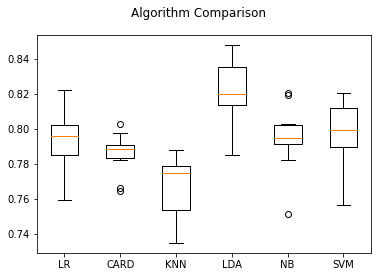

In [32]:
# Compare accuracy using boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**But**

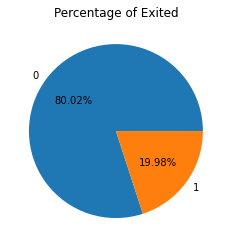

In [33]:
plt.pie(df['Exited'].value_counts(), autopct = '%1.2f%%', labels=[0, 1])
plt.title('Percentage of Exited')
plt.show()

unbalance -> cannot use

In [34]:
#Define x and y axis
x = X_test
y_true = np.array(y_test)

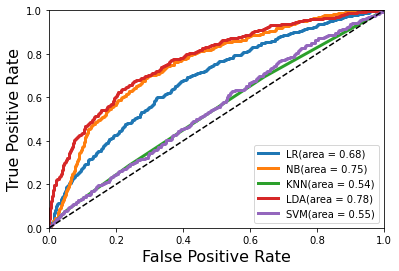

<Figure size 720x432 with 0 Axes>

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Logistic Regression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, x, y_true, method='decision_function',cv=10)

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_true,y_score_lr)


# GaussianNB

gnb = GaussianNB()
gnb.fit(x,y_true)
gnb_results = cross_val_score(gnb,x,y_true,scoring='accuracy')
y_score_gnb = cross_val_predict(gnb,x,y_true,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
#from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])

# SVC
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='decision_function',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc)


# ROC Curve for the models above
#plt.plot(nb_FPr, nb_TPr, linewidth = 3, label = 'GaussianNB (area = %0.2f)' % nb_roc_auc)
plt.plot(fpr_lr, tpr_lr, linewidth = 3, label='LR(area = %0.2f)' % roc_auc_score(y_true,y_score_lr))
plt.plot(fpr_gnb, tpr_gnb, linewidth = 3, label='NB(area = %0.2f)' % roc_auc_score(y_true,y_score_gnb[:,1]))
plt.plot(fpr_knn, tpr_knn, linewidth = 3, label='KNN(area = %0.2f)' % roc_auc_score(y_true,y_score_knn[:,1]))
plt.plot(fpr_lda, tpr_lda, linewidth = 3, label='LDA(area = %0.2f)' % roc_auc_score(y_true,y_score_lda[:,1]))
plt.plot(fpr_svc, tpr_svc, linewidth = 3, label='SVM(area = %0.2f)' % roc_auc_score(y_true,y_score_svc))


plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()

LDA, NB, LR, SVM, KNN

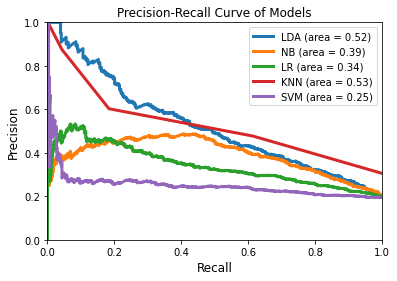

<Figure size 1080x1080 with 0 Axes>

In [36]:
# Plot Precision-Recall curve
from sklearn.metrics import plot_roc_curve, precision_recall_curve, roc_curve, auc, f1_score

#LDA
lda_precision, lda_recall, threshold = precision_recall_curve(y_test, lda.predict_proba(X_test)[:,1])
lda_f1 = f1_score(y_test,lda.predict(X_test))
lda_roc_auc = auc(lda_recall, lda_precision)

#NB
gnb_precision, gnb_recall, threshold = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:,1])
gnb_f1 = f1_score(y_test,gnb.predict(X_test))
gnb_roc_auc = auc(gnb_recall, gnb_precision)

#LR
lr_precision, lr_recall, threshold = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_f1 = f1_score(y_test,lr.predict(X_test))
lr_roc_auc = auc(lr_recall, lr_precision)

#KNN
knc_precision, knc_recall, threshold = precision_recall_curve(y_test, knc.predict_proba(X_test)[:,1])
knc_f1 = f1_score(y_test,knc.predict(X_test))
knc_roc_auc = auc(knc_recall, knc_precision)

#SVC
svc_precision, svc_recall, threshold = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])
svc_f1 = f1_score(y_test,svc.predict(X_test))
svc_roc_auc = auc(svc_recall, svc_precision)


plt.plot(lda_recall, lda_precision, linewidth = 3,label = 'LDA (area = %0.2f)' % lda_roc_auc)
plt.plot(gnb_recall, gnb_precision, linewidth = 3,label = 'NB (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_recall, lr_precision, linewidth = 3,label = 'LR (area = %0.2f)' % lr_roc_auc)
plt.plot(knc_recall, knc_precision, linewidth = 3,label = 'KNN (area = %0.2f)' % knc_roc_auc)
plt.plot(svc_recall, svc_precision, linewidth = 3,label = 'SVM (area = %0.2f)' % svc_roc_auc)


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve of Models')
plt.legend(loc = "upper right")
plt.figure(figsize = (15,15))
plt.show()

KNN, LDA, NB, LR, SVM

# Fit Model

## LDA

In [37]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model 

LinearDiscriminantAnalysis()

In [38]:
print(ldamodel.classes_)
print(ldamodel.intercept_)
pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-4.09773438]


,Coeff
CreditScore,-4.897031e-04
Gender,-5.779125e-01
Age,9.857703e-02
Tenure,-1.333484e-02
Balance,1.267220e-06
NumOfProducts,-3.836744e-01
HasCrCard,-3.073800e-02
IsActiveMember,-9.880782e-01
EstimatedSalary,5.975045e-07
France,-6.681504e-02


In [39]:
ldamodel.predict_proba(X_test)

array([[0.97891506, 0.02108494],
       [0.91287517, 0.08712483],
       [0.96844528, 0.03155472],
       ...,
       [0.8329088 , 0.1670912 ],
       [0.91259979, 0.08740021],
       [0.51237452, 0.48762548]])

In [40]:
confusion_matrix(y_test, ldamodel.predict(X_test))

array([[1884,   89],
       [ 347,  130]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

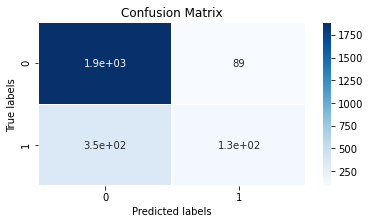

In [41]:
#Linear Discriminant Analysis
cm2=confusion_matrix(y_test,ldamodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [42]:
LDAreport = classification_report(y_test, ldamodel.predict(X_test))
print(LDAreport)

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1973
           1       0.59      0.27      0.37       477

    accuracy                           0.82      2450
   macro avg       0.72      0.61      0.63      2450
weighted avg       0.80      0.82      0.79      2450



# LR

In [43]:
Logisticmodel = LogisticRegression() #create instance of Logistic Regression with penalty=l2 by default
Logisticmodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model

LogisticRegression()

In [44]:
print(Logisticmodel.classes_)
print(Logisticmodel.intercept_)
pd.DataFrame(Logisticmodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-0.00025023]


,Coeff
CreditScore,-0.005581
Gender,-0.001271
Age,0.053135
Tenure,-0.002197
Balance,0.000003
NumOfProducts,-0.001099
HasCrCard,-0.000235
IsActiveMember,-0.001690
EstimatedSalary,-0.000001
France,-0.001013


In [45]:
Logisticmodel.predict_proba(X_test)

array([[0.92855401, 0.07144599],
       [0.80125258, 0.19874742],
       [0.77694812, 0.22305188],
       ...,
       [0.62276663, 0.37723337],
       [0.73360707, 0.26639293],
       [0.70167381, 0.29832619]])

In [46]:
confusion_matrix(y_test, Logisticmodel.predict(X_test))

array([[1920,   53],
       [ 430,   47]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

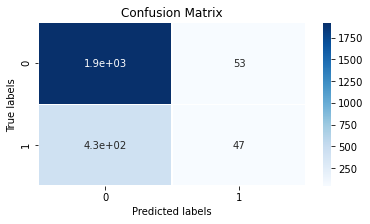

In [47]:
#Logistic Regression
cm1=confusion_matrix(y_test, Logisticmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [48]:
#Classification report
Logisticreport = classification_report(y_test, Logisticmodel.predict(X_test))
print(Logisticreport)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1973
           1       0.47      0.10      0.16       477

    accuracy                           0.80      2450
   macro avg       0.64      0.54      0.53      2450
weighted avg       0.75      0.80      0.75      2450



## NB

In [49]:
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)

GaussianNB()

In [50]:
NBmodel.predict_proba(X_test)

array([[0.93612029, 0.06387971],
       [0.89428886, 0.10571114],
       [0.870792  , 0.129208  ],
       ...,
       [0.80411267, 0.19588733],
       [0.9032408 , 0.0967592 ],
       [0.50651063, 0.49348937]])

In [51]:
NBMatrix = confusion_matrix(y_test, NBmodel.predict(X_test))
NBMatrix

array([[1876,   97],
       [ 402,   75]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

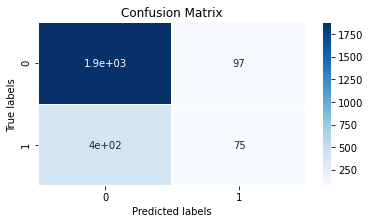

In [52]:
predictions2 = NBmodel.predict(X_test)
cm2 = confusion_matrix(y_test, NBmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [53]:
#Classification report
NBreport = classification_report(y_test, NBmodel.predict(X_test))
print(NBreport)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1973
           1       0.44      0.16      0.23       477

    accuracy                           0.80      2450
   macro avg       0.63      0.55      0.56      2450
weighted avg       0.75      0.80      0.76      2450



# KNN

In [134]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [135]:
#Checking model's performance
knn.predict_proba(X)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

In [136]:
KNNpredict = knn.predict(X_test)
KNNpredict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
#Confusion matrix
KNNmatrix = confusion_matrix(y_test, KNNpredict)
KNNmatrix

array([[1738,  235],
       [ 419,   58]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

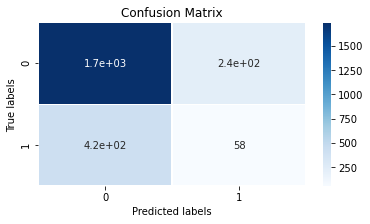

In [138]:
predictions3 = knn.predict(X_test)
cm3 = confusion_matrix(y_test, knn.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm3, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [139]:
KNNreport = classification_report(y_test, knn.predict(X_test))
print(KNNreport)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1973
           1       0.20      0.12      0.15       477

    accuracy                           0.73      2450
   macro avg       0.50      0.50      0.50      2450
weighted avg       0.69      0.73      0.71      2450



# Conclusion

      pre     recall
LDA   0.59    0.27
LR    0.47    0.1
NB    0.44    0.16
KNN   0.2     0.12

ROC: LDA, NB, LR, SVM, KNN
P-C: KNN, LDA, NB, LR, SVM

# Additional Information

This part we fit two other models for deeply understand the data set: Decision Tree, and LDA reduced model

## Tree

In [116]:
from sklearn.tree import plot_tree
from sklearn import tree


In [556]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

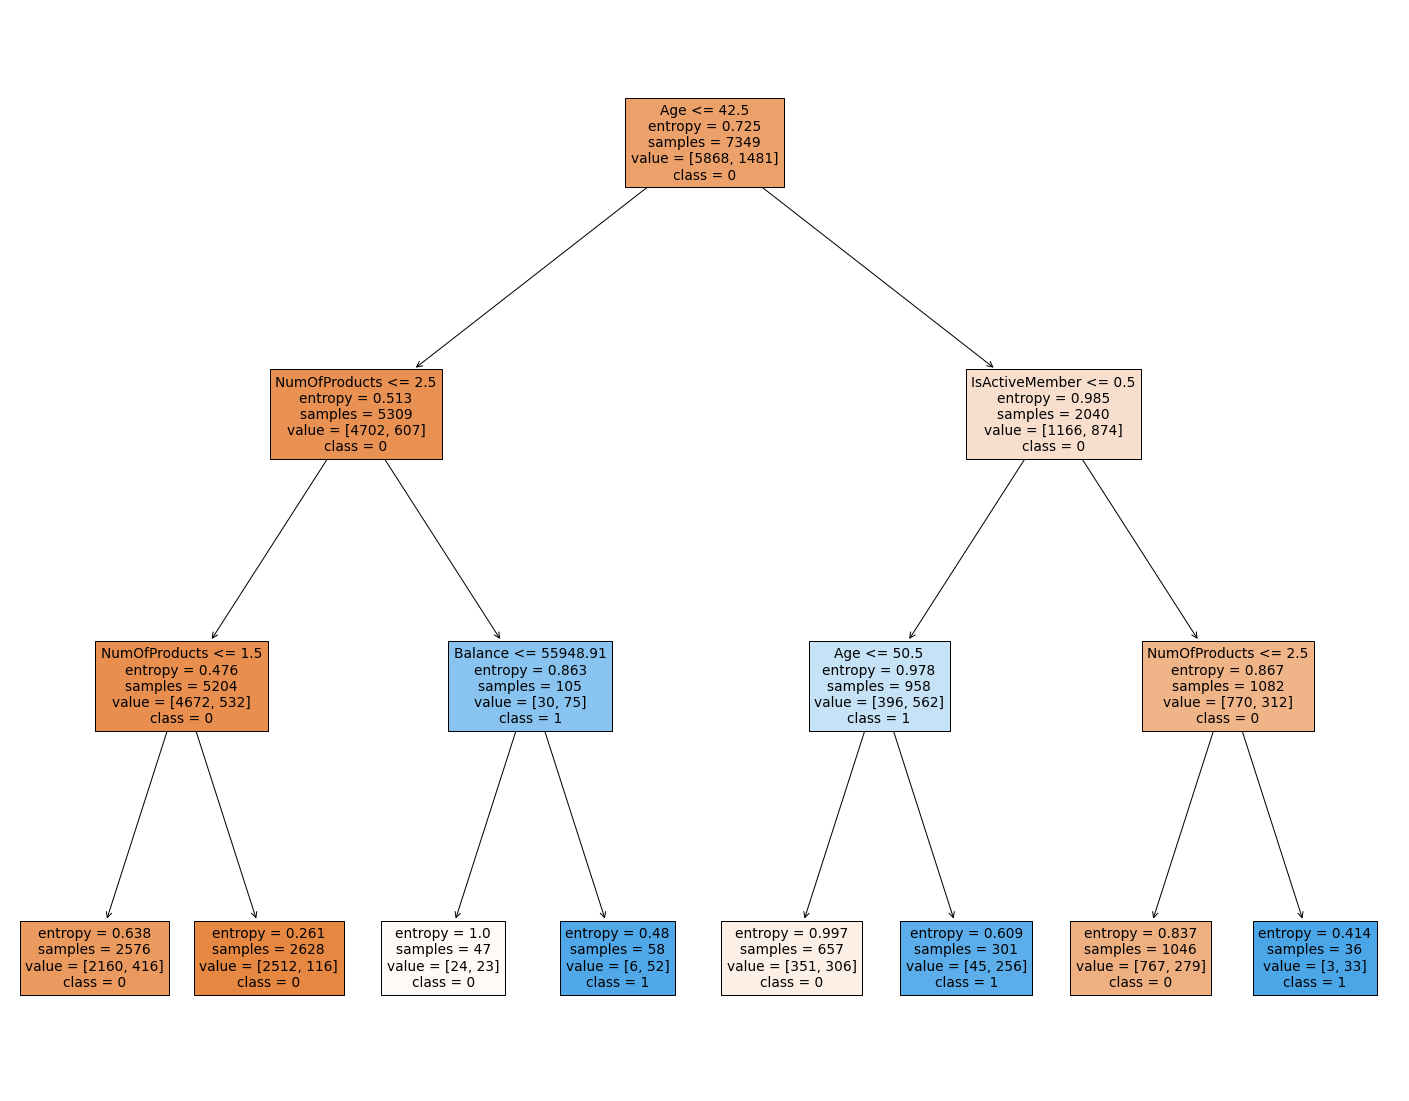

In [558]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names = df.drop('Exited', axis=1).columns, class_names = np.unique(df['Exited']).astype('str'), filled = True)

In [632]:
modelt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)
modelt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [633]:
Treepredict = modelt.predict(X_test)

In [634]:
modelt.score(X_test,y_test)

0.8665306122448979

In [635]:
Treematrix = confusion_matrix(y_test, Treepredict)
Treematrix

array([[1898,   75],
       [ 252,  225]], dtype=int64)

In [636]:
Treereport = classification_report(y_test, Treepredict)
print(Treereport)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1973
           1       0.75      0.47      0.58       477

    accuracy                           0.87      2450
   macro avg       0.82      0.72      0.75      2450
weighted avg       0.86      0.87      0.85      2450



Now we use ....... curve to calculate the depth nodes we should split to maintain high accruacy and avoid overfitting


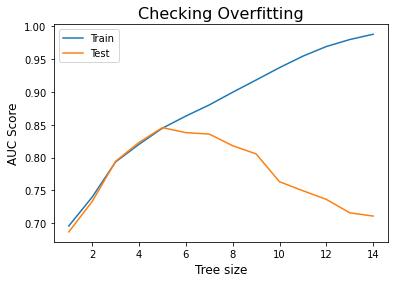

In [637]:
max_d = [i for i in range(1,15)]
score_train = list()
score_test = list()
for i in max_d:
    k = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    k.fit(X_train,y_train)
    score_train.append(roc_auc_score(y_train, k.predict_proba(X_train)[:,1]))
    score_test.append(roc_auc_score(y_test, k.predict_proba(X_test)[:,1]))
    
plt.plot(max_d,score_train, label = 'Train')
plt.plot(max_d,score_test, label = 'Test')
plt.xlabel('Tree size',fontsize = 12)
plt.ylabel('AUC Score',fontsize = 12)
plt.title('Checking Overfitting', fontsize = 16)
plt.legend()


In [638]:
from sklearn.metrics import f1_score
f1_score(y_test,modelt.predict(X_test))

0.5791505791505791

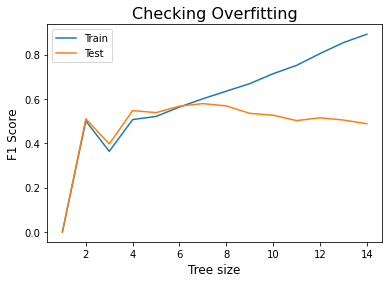

In [640]:
max_d = [i for i in range(1,15)]
score_train = list()
score_test = list()
for i in max_d:
    k = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    k.fit(X_train,y_train)
    score_train.append(f1_score(y_train,k.predict(X_train)))
    score_test.append(f1_score(y_test,k.predict(X_test)))
    
plt.plot(max_d,score_train, label = 'Train')
plt.plot(max_d,score_test, label = 'Test')
plt.xlabel('Tree size',fontsize = 12)
plt.ylabel('F1 Score',fontsize = 12)
plt.title('Checking Overfitting', fontsize = 16)
plt.legend()

## Feature Important for LDA

For parts above, we fit all the features to predict the target : CHURN. However, some of features may be not important or interact each other and cause multilinearity and overfitting. Below, we check their importance and reduce the model.

In [64]:
# print all the coefficient again
df1 = pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])
df1

,Coeff
CreditScore,-4.897031e-04
Gender,-5.779125e-01
Age,9.857703e-02
Tenure,-1.333484e-02
Balance,1.267220e-06
NumOfProducts,-3.836744e-01
HasCrCard,-3.073800e-02
IsActiveMember,-9.880782e-01
EstimatedSalary,5.975045e-07
France,-6.681504e-02


We construct X_Design
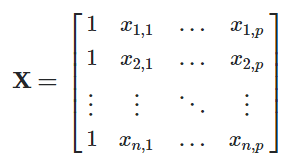



We construct matrix of covariates
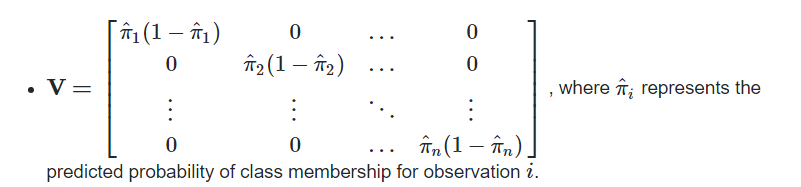

In [65]:
## add column of 1's at the beginning of your X_train matrix
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
print(X_design.shape)

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
predProbs = ldamodel.predict_proba(X_train)
V = np.diagflat(np.product(predProbs, axis=1))
print(V)

(7349, 12)
[[0.13350396 0.         0.         ... 0.         0.         0.        ]
 [0.         0.23181253 0.         ... 0.         0.         0.        ]
 [0.         0.         0.22717775 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.10566513 0.         0.        ]
 [0.         0.         0.         ... 0.         0.21560245 0.        ]
 [0.         0.         0.         ... 0.         0.         0.02375297]]


The we calculate standard deviation of parameter as below
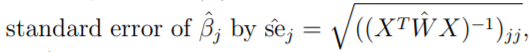
where W hat = V

In [89]:
# Covariance matrix
covLDA = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))

In [90]:
#Calculate sd
parameters_sd = np.sqrt(np.diag(covLDA))
print("Standard errors: ", parameters_sd)

parameters_sd = parameters_sd.reshape(12,1)

Standard errors:  [3.12430616e-01 3.40833175e-04 6.59844221e-02 3.52909619e-03
 1.13276894e-02 6.31277554e-07 6.23601589e-02 7.16709652e-02
 6.90339225e-02 5.75841664e-07 8.54788995e-02 9.48048118e-02]


In [68]:
df1['Sd'] = parameters_sd[1:]
df1

,Coeff,Sd
CreditScore,-4.897031e-04,3.408332e-04
Gender,-5.779125e-01,6.598442e-02
Age,9.857703e-02,3.529096e-03
Tenure,-1.333484e-02,1.132769e-02
Balance,1.267220e-06,6.312776e-07
NumOfProducts,-3.836744e-01,6.236016e-02
HasCrCard,-3.073800e-02,7.167097e-02
IsActiveMember,-9.880782e-01,6.903392e-02
EstimatedSalary,5.975045e-07,5.758417e-07
France,-6.681504e-02,8.547890e-02


We use Wald Statistic to do the hypothesis test (following chi square distribution with df=1)
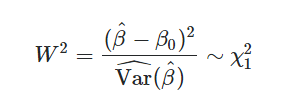

In [69]:
# Wald statistic (coefficient / s.e.) **2
logitParams = np.insert(ldamodel.coef_, 0, ldamodel.intercept_)
chi = (logitParams / np.sqrt(np.diag(covLDA))) ** 2
print("Wald statistics: ", chi)

Wald statistics:  [1.72020591e+02 2.06434393e+00 7.67081099e+01 7.80233313e+02
 1.38577659e+00 4.02961574e+00 3.78539568e+01 1.83935163e-01
 2.04860167e+02 1.07665393e+00 6.10985139e-01 9.76052520e+01]


In [70]:
logitParams

array([-4.09773438e+00, -4.89703138e-04, -5.77912460e-01,  9.85770324e-02,
       -1.33348441e-02,  1.26722043e-06, -3.83674428e-01, -3.07380019e-02,
       -9.88078188e-01,  5.97504458e-07, -6.68150420e-02,  9.36627650e-01])

In [71]:
df1['Chi square'] = chi[1:]

df1

,Coeff,Sd,Chi square
CreditScore,-4.897031e-04,3.408332e-04,2.064344
Gender,-5.779125e-01,6.598442e-02,76.708110
Age,9.857703e-02,3.529096e-03,780.233313
Tenure,-1.333484e-02,1.132769e-02,1.385777
Balance,1.267220e-06,6.312776e-07,4.029616
NumOfProducts,-3.836744e-01,6.236016e-02,37.853957
HasCrCard,-3.073800e-02,7.167097e-02,0.183935
IsActiveMember,-9.880782e-01,6.903392e-02,204.860167
EstimatedSalary,5.975045e-07,5.758417e-07,1.076654
France,-6.681504e-02,8.547890e-02,0.610985


In [91]:
from scipy import stats
df1['P_value']=(1-stats.chi2.cdf(df1['Chi square'] , 1)).round(4)
df1

,Coeff,Sd,Chi square,P_value
CreditScore,-4.897031e-04,3.408332e-04,2.064344,0.1508
Gender,-5.779125e-01,6.598442e-02,76.708110,0.0000
Age,9.857703e-02,3.529096e-03,780.233313,0.0000
Tenure,-1.333484e-02,1.132769e-02,1.385777,0.2391
Balance,1.267220e-06,6.312776e-07,4.029616,0.0447
NumOfProducts,-3.836744e-01,6.236016e-02,37.853957,0.0000
HasCrCard,-3.073800e-02,7.167097e-02,0.183935,0.6680
IsActiveMember,-9.880782e-01,6.903392e-02,204.860167,0.0000
EstimatedSalary,5.975045e-07,5.758417e-07,1.076654,0.2994
France,-6.681504e-02,8.547890e-02,0.610985,0.4344


Choosing alpha = 0.05, the we choose parameters having p-value < 0.05/2 = 0.025 and fit model agian. They are:
##### 'Gender','Age','NumOfProducts','IsActiveMember','Germany'

In [97]:
X_train1 = X_train[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]
X_test1 = X_test[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]

In [98]:
LAmodel2 = LinearDiscriminantAnalysis()

In [99]:
LAmodel2.fit(X_train1,y_train)

LinearDiscriminantAnalysis()

In [100]:
print(LAmodel2.score(X_test1, y_test))

0.8228571428571428


In [101]:
Logisticmatrix1 = confusion_matrix(y_test, LAmodel2.predict(X_test1))
Logisticmatrix1

array([[1885,   88],
       [ 346,  131]], dtype=int64)

In [102]:
LDAreport1 = classification_report(y_test, LAmodel2.predict(X_test1))
print(LDAreport1)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1973
           1       0.60      0.27      0.38       477

    accuracy                           0.82      2450
   macro avg       0.72      0.62      0.64      2450
weighted avg       0.80      0.82      0.80      2450



From the report and confusion matrix, we can see that the model just improves a liitle bit (accuracy score, precision increases), the model help us reduce cost and time to collect data and fit the model (only 5 features needed comparing to 11). Also, they would modify the severity of interaction, multilinearity and overfitting when using too many features

0.7838790123692915